# Sourcing & Analyzing Time-Series Data

### This Script Contains the Following Points:
#### 1. Importing Libraries & Data
#### 2. Subsetting for time series
#### 3. Decomposition
#### 4. Stationarity Test
#### 5. Autocorrelations Check
#### 6. Stationarization of Data

## 1. Importing Libraries & Data

In [5]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

# Disabling depracation warnings 
warnings.filterwarnings("ignore") 

# Choosing styling option for plot appearance
plt.style.use('fivethirtyeight')

In [6]:
# Configure API key 

quandl.ApiConfig.api_key = 'Xzmq2iTzEE9Jn4gpKAP9'

In [7]:
#Create Folder path to data
path = r'/Users/C SaiVishwanath/Desktop/2024 Projects/Netflix'

#Import Airbnb data as 'df'
df=pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'netflix_OTT.csv'))

In [8]:
df.head()

,Year-Month,Date,Year,Month,Global Revenue,UCAN Streaming Revenue,EMEA Streaming Revenue,LATM Streaming Revenue,APAC Streaming Revenue,UCAN Members,EMEA Members,LATM Members,APAC Members,UCAN ARPU,EMEA ARPU,LATM ARPU,APAC ARPU,Netflix Streaming Memberships
0,2019-03,31-03-2019,2019,March,4520992000,2256851000,1233379000,630472000,319602000,66633000,42542000,27547000,12141000,11.45,10.23,7.84,9.37,148863000
1,2019-06,30-06-2019,2019,June,4923116000,2501199000,1319087000,677136000,349494000,66501000,44229000,27890000,12942000,12.52,10.13,8.14,9.29,151562000
2,2019-09,30-09-2019,2019,September,5244905000,2621250000,1428040000,741434000,382304000,67114000,47355000,29380000,14485000,13.08,10.40,8.63,9.29,158334000
3,2019-12,31-12-2019,2019,December,5467434000,2671908000,1562561000,746392000,418121000,67662000,51778000,31417000,16233000,13.22,10.51,8.18,9.07,167090000
4,2020-03,31-03-2020,2020,March,5767691000,2702776000,1723474000,793453000,483660000,69969000,58734000,34318000,19835000,13.09,10.40,8.05,8.94,182856000


In [9]:
# Checking column data types

df.dtypes

Year-Month                         object
Date                               object
Year                                int64
Month                              object
Global Revenue                      int64
UCAN Streaming Revenue              int64
EMEA Streaming Revenue              int64
LATM Streaming Revenue              int64
APAC Streaming Revenue              int64
UCAN Members                        int64
EMEA  Members                       int64
LATM Members                        int64
APAC Members                        int64
UCAN ARPU                         float64
EMEA ARPU                         float64
LATM  ARPU                        float64
APAC  ARPU                        float64
Netflix Streaming Memberships       int64
dtype: object

In [10]:
df.shape

(21, 18)

## 2. Subsetting for Time Series

In [12]:
# Create a subset with the desired columns
df_sub = df[['Year-Month', 'Netflix Streaming Memberships ']]

In [13]:
# Selecting These columns to see if there is a seasonal component for then Netflix gains or loses subscribers
# Streaming may be more popular in colder months, so I would like to see if that has an impact on when Netflix obtains subscribers

In [14]:
df_sub.head()

,Year-Month,Netflix Streaming Memberships
0,2019-03,148863000
1,2019-06,151562000
2,2019-09,158334000
3,2019-12,167090000
4,2020-03,182856000


In [15]:
df_sub.shape

(21, 2)

In [16]:
# Turn df_sub into data frame
df_sub = df_sub.reset_index()
df_sub

,index,Year-Month,Netflix Streaming Memberships
0,0,2019-03,148863000
1,1,2019-06,151562000
2,2,2019-09,158334000
3,3,2019-12,167090000
4,4,2020-03,182856000
5,5,2020-06,192947000
6,6,2020-09,195151000
7,7,2020-12,203663000
8,8,2021-03,207639000
9,9,2021-06,209180000


In [17]:
df_sub['datetime'] = pd.to_datetime(df_sub['Year-Month']) # Create a datetime column from "Year-Month.""
df_sub = df_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
df_sub.drop(['Year-Month'], axis=1, inplace=True) # Drop the "Year-Month" column.
df_sub.head()

,index,Netflix Streaming Memberships
datetime,,
2019-03-01,0,148863000
2019-06-01,1,151562000
2019-09-01,2,158334000
2019-12-01,3,167090000
2020-03-01,4,182856000


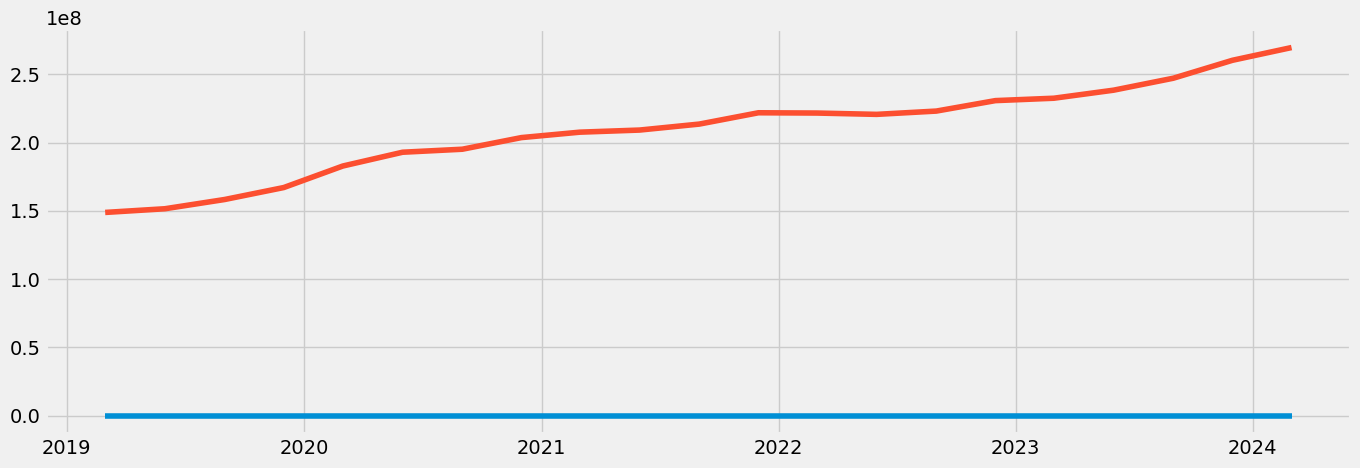

In [18]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub)

In [19]:
# Check for missing values
df_sub.isnull().sum() 

index                             0
Netflix Streaming Memberships     0
dtype: int64

In [20]:
# Check for duplicates
dups = df_sub.duplicated()
dups.sum()

0

**Observations:**
- There appears to be no seasonality in when Netflix gains or loses subscribers
- Over the years there has been an upward trend, a steady increase in Netflix Streaming Memberships

## 3. Decomposition

In [23]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_sub['Netflix Streaming Memberships '], model='additive')


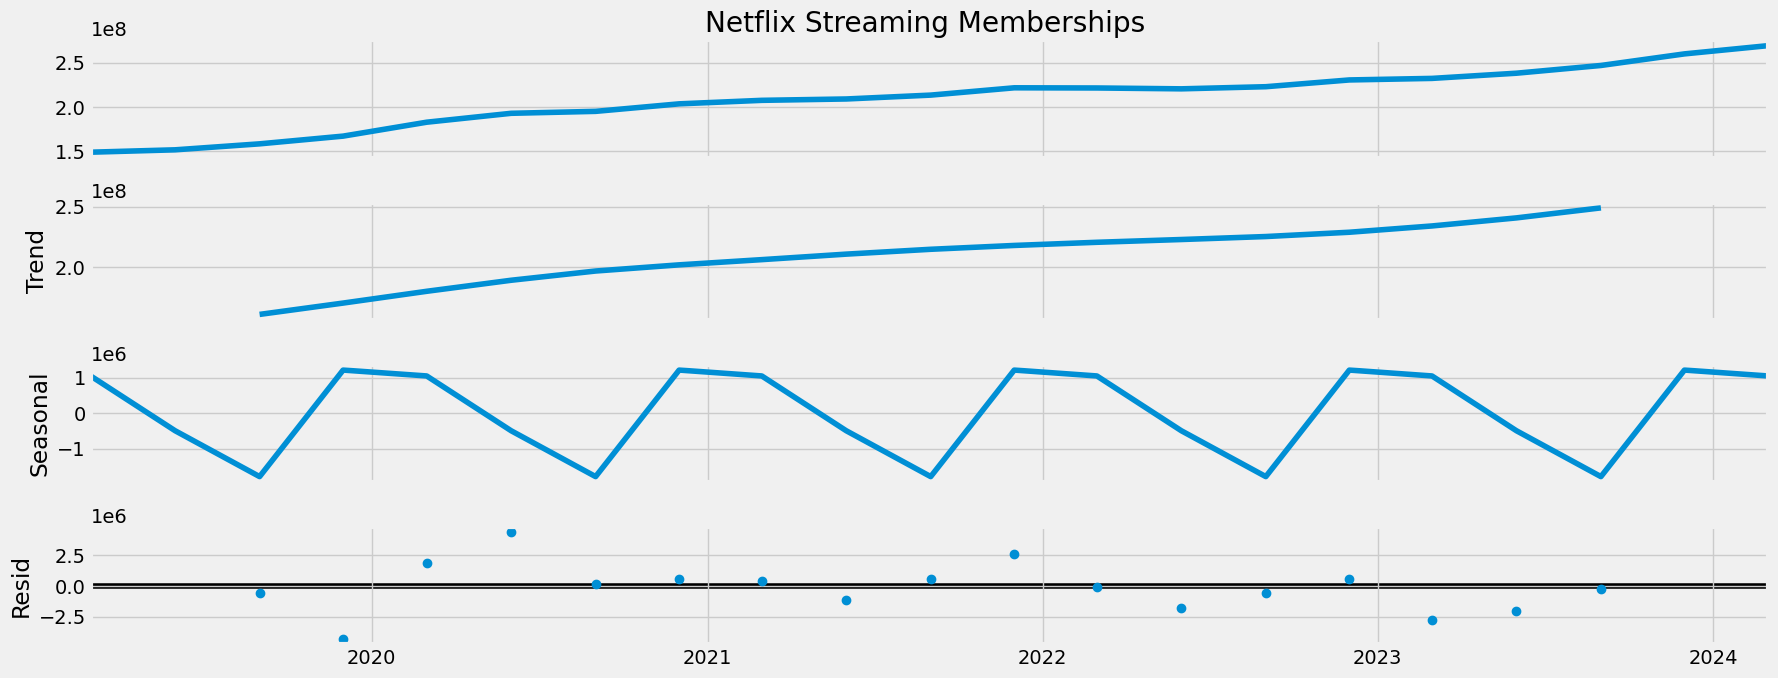

In [24]:
from pylab import rcParams # This will define a fixed size for all special charts.
rcParams['figure.figsize'] = 18, 7
# Plot the separate components
decomposition.plot()
plt.show()

**Observations:**
- The underlying trend line is very close to the actual data, showing an upward trend
- The decomposition reveals a seasonal component that was not found in the time series

## 4. Stationarity Test

In [27]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_sub['Netflix Streaming Memberships '])

Dickey-Fuller Stationarity test:
Test Statistic                  0.960566
p-value                         0.993832
Number of Lags Used             6.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


**Onservations:**
- The test statistic is positive (0.960566), which is greater than all the critical values
- the p-value is very high (0.993832), suggesting that the null hypothesis cannot be rejected
- The time series is most likelt non-stationary

## 5. Autocorrelations Check

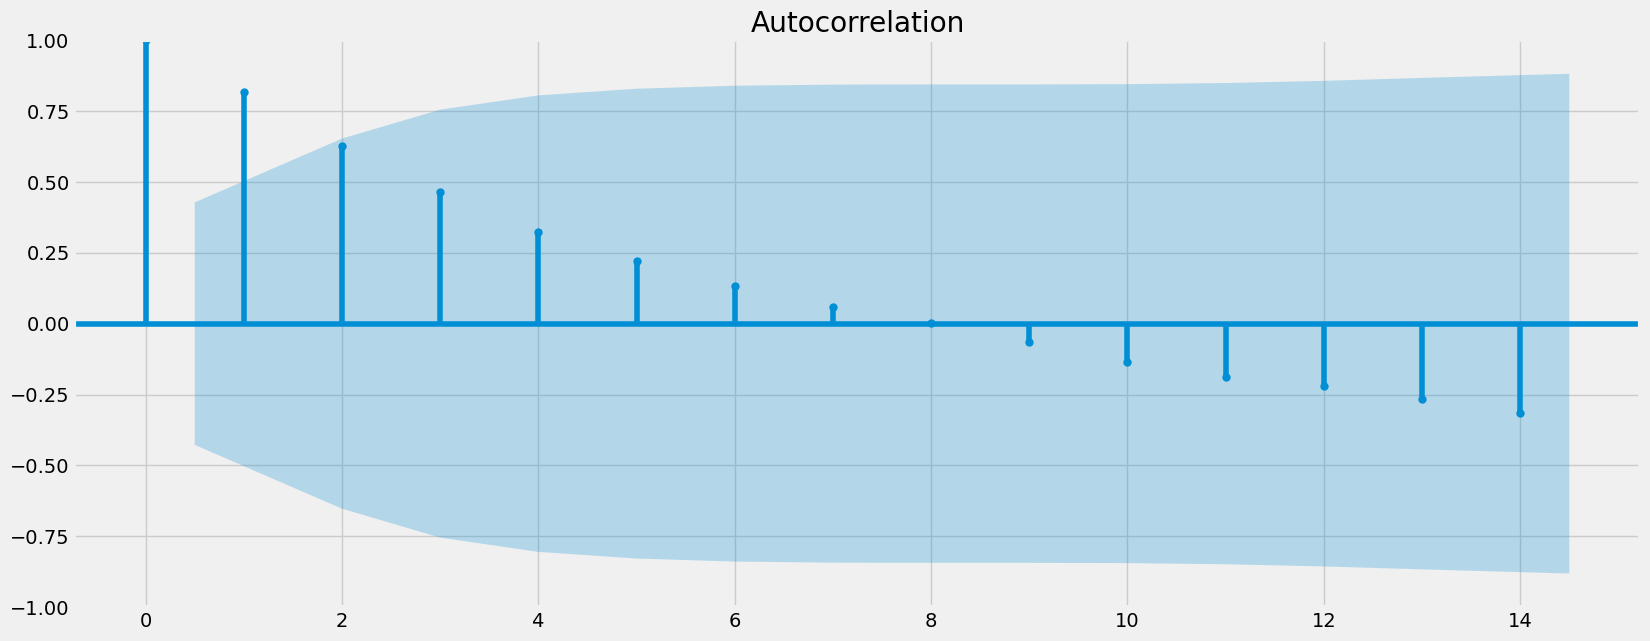

In [32]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_sub['Netflix Streaming Memberships '])  # Replace 'value_column' with the actual column name
plt.show()


**Observations:**
- The current value in the time series is not strongly correlated with its past values (lags) at those points
- The test is indicating no significant autocorrelation for the lags within the blue area
- There are 2 lags above the confidence interval, which means the data is not perfectly stationnary
- There are a small enough number of lags, and no differencing is necessary

## 6. Stationarization of Data

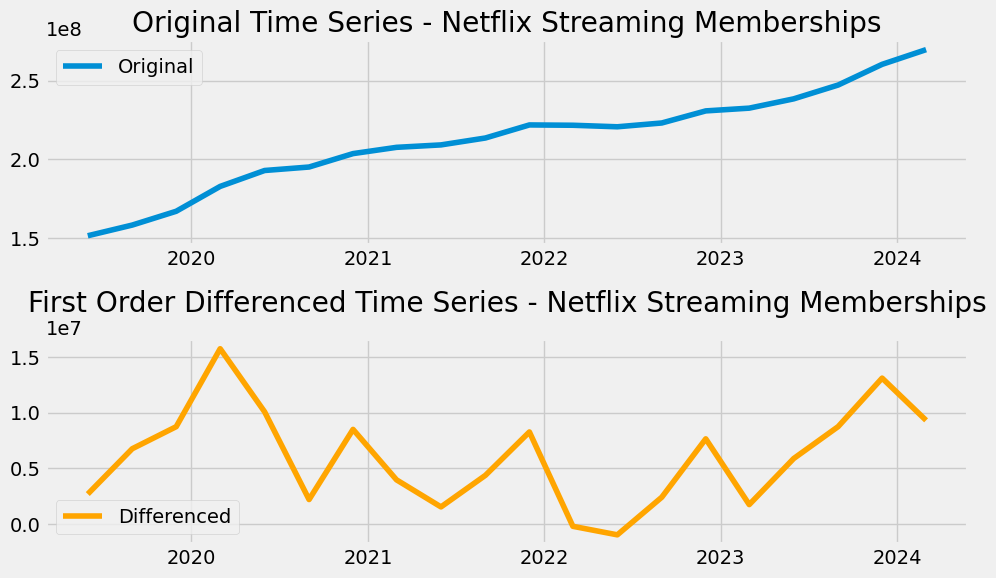

In [36]:
# Step 1: First-order differencing
df_sub['Differenced_Memberships'] = df_sub['Netflix Streaming Memberships '].diff()

# Step 2: Drop any NaN values caused by differencing (if applicable)
df_sub = df_sub.dropna()

# Step 3: Plot the original and differenced time series to visualize the effect of differencing
plt.figure(figsize=(10,6))

# Original time series
plt.subplot(2,1,1)
plt.plot(df_sub['Netflix Streaming Memberships '], label='Original')
plt.title('Original Time Series - Netflix Streaming Memberships')
plt.legend()

# Differenced time series
plt.subplot(2,1,2)
plt.plot(df_sub['Differenced_Memberships'], label='Differenced', color='orange')
plt.title('First Order Differenced Time Series - Netflix Streaming Memberships')
plt.legend()

plt.tight_layout()
plt.show()

In [38]:
# Performing Dickey-Fuller Test on the differenced time series

adf_result = adfuller(df_sub['Differenced_Memberships'])

# Printing the ADF test results
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if adf_result[1] < 0.05:
    print("The time series is stationary (reject null hypothesis of unit root).")
else:
    print("The time series is non-stationary (fail to reject the null hypothesis of unit root).")

ADF Statistic: -6.696745
p-value: 0.000000
Critical Values:
	1%: -4.223
	5%: -3.189
	10%: -2.730
The time series is stationary (reject null hypothesis of unit root).
